<a href="https://colab.research.google.com/github/Prishn3113/Codsoft_DS_Internship/blob/main/CREDIT_CARD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CREDIT CARD FRAUD DETECTION**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/creditC.csv')
print(data.head())
print(data.info())
print(data.describe())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [ ]:
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

In [ ]:
data['Class'].value_counts()

,count
Class,
0.0,5844
1.0,3


In [ ]:
normal=data[data.Class==0]
fraud=data[data.Class==1]
print(normal.shape)

(5844, 31)


In [ ]:
normal.Amount.describe()

,Amount
count,5844.000000
mean,-0.000507
std,0.999770
min,-0.336525
25%,-0.313793
50%,-0.255599
75%,-0.044096
max,39.531500


In [ ]:
fraud.Amount.describe()

,Amount
count,3.000000
mean,0.988424
std,1.369250
min,-0.336525
25%,0.283613
50%,0.903750
75%,1.650898
max,2.398046


In [ ]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,2595.144422,-0.261024,0.280833,0.843675,0.088231,-0.003062,0.188308,0.019508,-0.042136,0.381982,...,0.056960,-0.040270,-0.161420,-0.03776,0.028927,0.089757,-0.039626,0.026798,0.005685,-0.000507
1.0,1780.000000,-2.553039,0.184644,-0.293711,2.872264,0.005330,-0.855718,-0.549831,0.308239,-1.093098,...,0.599742,0.294921,-0.177321,0.36116,-0.020311,0.056068,-0.170050,0.015979,-0.086847,0.988424


In [ ]:
normal_sample=normal.sample(n=492)
new_file=pd.concat([normal_sample,fraud],axis=0)
new_file.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3285,2831,-0.750459,1.420807,-0.462576,1.666384,2.500814,3.926857,0.346082,1.222137,-2.316195,...,0.074265,-0.181007,-0.200130,1.012019,0.636373,0.368670,-0.097641,0.010494,0.018814,0.0
4466,3771,1.318339,-0.505506,0.551921,-0.626876,-0.870370,-0.471637,-0.708820,-0.109281,0.287164,...,-0.195055,-0.562245,0.062368,-0.078816,0.203352,-0.520533,-0.028736,0.008996,-0.098219,0.0
203,135,1.207207,0.241318,0.258745,0.653335,-0.256426,-0.620309,-0.039653,-0.022139,0.145191,...,-0.267165,-0.780158,0.165657,0.012956,0.116176,0.126406,-0.012156,0.026239,-0.312901,0.0
607,459,-0.528218,0.981232,1.652988,-0.150715,0.137048,-0.203980,0.583370,0.165246,-0.781696,...,-0.123569,-0.272731,0.023887,0.223936,-0.297777,0.068300,0.281018,0.111557,-0.300391,0.0
689,521,1.132712,-0.931559,0.913450,-0.804352,-1.066478,0.577369,-1.153211,0.300888,-0.793747,...,0.533603,1.436067,-0.114943,-0.206096,0.255425,-0.016737,0.061154,0.020807,0.025276,0.0
3680,3142,-0.597147,0.807954,0.873040,-2.282041,0.314363,-1.012223,1.032713,-0.244944,0.835748,...,0.057482,0.557188,-0.333841,-0.009777,0.127766,-0.830674,0.337326,0.032121,-0.331355,0.0
1562,1224,-1.956935,0.484410,-0.514448,-2.201511,-0.830896,-0.761038,0.797049,0.695167,0.076813,...,0.153256,0.570306,0.304068,0.082721,0.016927,-0.103999,0.406586,-0.128045,0.490567,0.0
2955,2500,-0.545070,0.900823,1.174433,-0.148957,0.876214,1.035892,0.354843,0.526486,-0.417472,...,-0.142364,-0.191616,0.113528,-1.017679,-0.472212,0.200674,0.316876,0.084066,-0.327272,0.0
973,737,-2.145531,0.583446,1.239023,0.322204,0.674411,-0.714822,0.189104,-0.037495,-0.201684,...,-0.402603,-0.715543,-0.000563,-0.032370,0.183831,0.232982,-0.037453,0.338922,-0.326289,0.0
2022,1568,-0.734520,1.273856,2.318583,2.788346,0.280340,0.234791,0.704149,-0.216871,-1.390058,...,0.186015,0.703158,-0.275216,0.443401,0.137219,0.353190,-0.334181,-0.114604,-0.254126,0.0


In [ ]:
new_file['Class'].value_counts()

,count
Class,
0.0,492
1.0,3


In [ ]:
new_file.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,2664.512195,-0.238463,0.321592,0.922840,0.102536,-0.020164,0.250284,0.060327,-0.033988,0.417456,...,0.054178,-0.060041,-0.145396,-0.028158,0.020331,0.084897,-0.018747,0.023074,0.002370,-0.013132
1.0,1780.000000,-2.553039,0.184644,-0.293711,2.872264,0.005330,-0.855718,-0.549831,0.308239,-1.093098,...,0.599742,0.294921,-0.177321,0.361160,-0.020311,0.056068,-0.170050,0.015979,-0.086847,0.988424


In [ ]:
X=new_file.drop(columns='Class',axis=1)
Y=new_file['Class']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(495, 30) (396, 30) (99, 30)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))
print("Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Logistic Regression
[[147   0]
 [  1   1]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       147
         1.0       1.00      0.50      0.67         2

    accuracy                           0.99       149
   macro avg       1.00      0.75      0.83       149
weighted avg       0.99      0.99      0.99       149

Random Forest
[[147   0]
 [  2   0]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       147
         1.0       0.00      0.00      0.00         2

    accuracy                           0.99       149
   macro avg       0.49      0.50      0.50       149
weighted avg       0.97      0.99      0.98       149



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


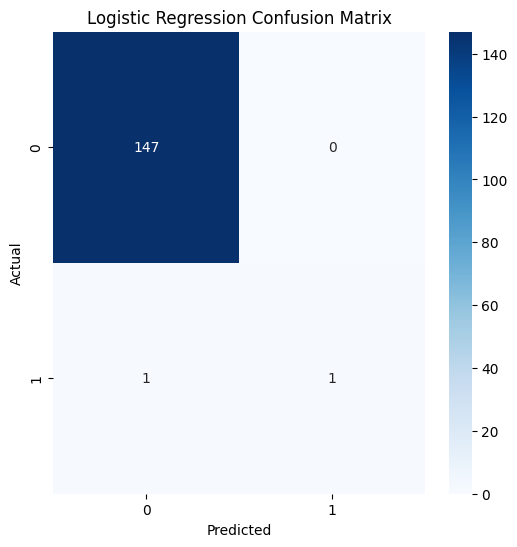

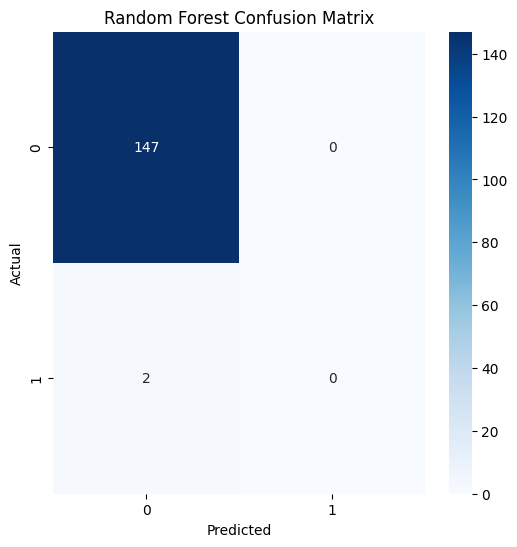

In [ ]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plot_confusion_matrix(cm_log_reg, 'Logistic Regression Confusion Matrix')

cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm_rf, 'Random Forest Confusion Matrix')
